# ANOVA

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Data frames.
import pandas as pd

## More Samples

In [2]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

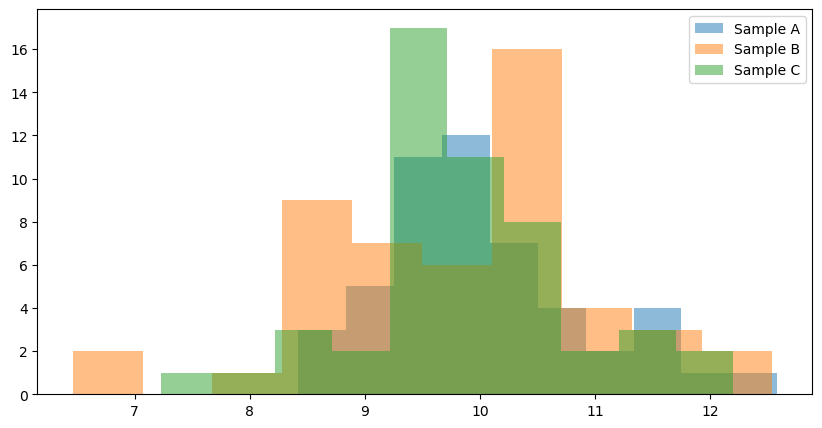

In [3]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [4]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(0.9359696998159511, 0.3515895304035689)

In [5]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(-0.9359696998159511, 0.3515895304035689)

In [6]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(1.0564761917306786, 0.293348135461503)

In [7]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(-0.05881335767534408, 0.9532205301166439)

## $n$ Samples

In [8]:
# Number of samples.
n = 4

In [9]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [10]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [11]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [12]:
# Suppose we had 6 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

In [13]:
def simulate_ttest(alpha=0.05):
    # Geneate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b)
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False

In [14]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

483

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

In [15]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [16]:
# Create data frame.
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,24.245988,18.166686,22.073791
1,23.077924,19.864133,27.121714
2,20.677093,21.504006,22.693124
3,25.078769,24.066953,23.797575
4,25.072904,26.368017,24.371993
5,28.497150,20.783383,23.110379
6,27.072850,26.898612,18.282458
7,24.486079,16.030344,24.619651
8,26.513665,19.142328,30.032318
9,29.622669,25.025324,29.996443


In [17]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,25.434509,21.784979,24.609945
std,2.614598,3.663999,3.618382
min,20.677093,16.030344,18.282458
25%,24.306010,19.322779,22.797438
50%,25.075837,21.143694,24.084784
75%,26.933054,24.785732,26.496198
max,29.622669,26.898612,30.032318


In [18]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(3.2948984100068226, 0.05243378735993497)

In [19]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.650     0.054    -0.048     7.347
 (0 - 2)      0.825     0.846    -2.873     4.522
 (1 - 0)     -3.650     0.054    -7.347     0.048
 (1 - 2)     -2.825     0.160    -6.522     0.872
 (2 - 0)     -0.825     0.846    -4.522     2.873
 (2 - 1)      2.825     0.160    -0.872     6.522



## Presenting the Data

In [20]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

# Concatenate arrays.
data = np.concatenate([beginner, intermediate, advanced])

# Show.
data

array([25.09773266, 22.23470318, 28.11900266, 23.96426928, 31.02609459,
       26.21365482, 28.40435072, 25.75093711, 28.47146767, 26.12599502,
       21.1445339 , 22.63626882, 18.76677007, 32.58102316, 24.85420744,
       25.12658344, 26.11617318, 25.52465973, 21.18389969, 24.9953032 ,
       21.93442069, 23.24567564, 17.87045318, 26.27822047, 24.75159031,
       22.05991854, 16.95113536, 28.79379863, 21.68888542, 21.05507516])

In [21]:
# Create the labels.
labels = ['Beginner'] * 10 + ['Intermediate'] * 10 + ['Advanced'] * 10

# Show.
labels

['Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced']

In [22]:
# Create data frame.
df = pd.DataFrame({'Course': labels, 'Time': data})

# Show.
df

,Course,Time
0,Beginner,25.097733
1,Beginner,22.234703
2,Beginner,28.119003
3,Beginner,23.964269
4,Beginner,31.026095
5,Beginner,26.213655
6,Beginner,28.404351
7,Beginner,25.750937
8,Beginner,28.471468
9,Beginner,26.125995


In [23]:
# Pull the groups out.
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']

# Perform ANOVA.
f, p = stats.f_oneway(b_times, i_times, a_times)

# Show.
f, p

(3.744021564113561, 0.03671853551291419)

In [24]:
# Tukey's HSD.
res = stats.tukey_hsd(b_times, i_times, a_times)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.248     0.304    -1.453     5.949
 (0 - 2)      4.078     0.029     0.377     7.779
 (1 - 0)     -2.248     0.304    -5.949     1.453
 (1 - 2)      1.830     0.449    -1.871     5.531
 (2 - 0)     -4.078     0.029    -7.779    -0.377
 (2 - 1)     -1.830     0.449    -5.531     1.871



## The F Statistic using numpy

https://en.wikipedia.org/wiki/F-test#One-way_analysis_of_variance

In [25]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [26]:
# Calculate the means.
beginner_mean = beginner.mean()
intermediate_mean = intermediate.mean()
advanced_mean = advanced.mean()

In [27]:
# Y(bar)_i from the formula.
Y_i = np.array([beginner_mean, intermediate_mean, advanced_mean])

# Show.
Y_i

array([25.67089413, 20.41646859, 23.3510492 ])

In [28]:
# Y(bar) from the formula.
Y = np.concatenate([beginner, intermediate, advanced]).mean()

# Show.
Y

23.14613730840612

In [29]:
# Before the sum of squares.
Y_i - Y

array([ 2.52475683, -2.72966872,  0.20491189])

In [30]:
# Calculate the sum of squares between.
(Y_i - Y)**2

array([6.37439703, 7.45109131, 0.04198888])

In [31]:
# Size of the samples.
n_i = np.array([beginner.size, intermediate.size, advanced.size])

# Show.
n_i

array([10, 10, 10])

In [32]:
# Number of groups.
K = 3

In [33]:
# From the formula.
n_i * (Y_i - Y)**2

array([63.74397033, 74.51091309,  0.41988883])

In [34]:
# From the formula.
(n_i * (Y_i - Y)**2).sum()

138.67477225332158

In [35]:
# From the formula.
(n_i * (Y_i - Y)**2).sum() / (K - 1)

69.33738612666079

In [36]:
# Numerator.
numerator = (n_i * (Y_i - Y)**2).sum() / (K - 1)

In [37]:
# The total number of values.
N = n_i.sum()

# Show.
N

30

In [38]:
# From the formula.
less_means = np.concatenate([beginner - beginner_mean, intermediate - intermediate_mean, advanced - advanced_mean])

# Show.
less_means

array([-2.58562909, -3.54479375,  6.38390276, -6.23634582,  2.71495746,
       -2.4128826 , -0.39176708,  3.02208373, -0.58362787,  3.63410226,
       -2.21315634,  8.46882382,  0.53900994, -3.52219153, -3.84876253,
       -1.62465651,  2.89956487, -2.45636958,  3.80232828, -2.04459044,
       -1.31192964, -0.12162262, -6.08221814,  3.97165128, -3.10412701,
        1.23197501,  1.23152519,  2.75137131,  2.58019145, -1.14681683])

In [39]:
# From the formula.
np.sum(less_means**2)

357.4872005559535

In [40]:
# Denominator.
denominator = np.sum(less_means**2) / (N - K)

# Show.
denominator

13.240266687257538

In [41]:
# My F statistic calculation.
F = numerator / denominator

# Show.
F

5.2368572147713035

In [42]:
# Calculate F using scipy.
stats.f_oneway(beginner, intermediate, advanced)

F_onewayResult(statistic=5.236857214771304, pvalue=0.011970155355746177)

## End